## Drug Utilization Data Exploration and Visualization
- Medicaid Drug Rebate Program

Reference : https://hackernoon.com/visualizing-state-drug-utilization-data-sets-bf65e990a766

Dataset : https://www.medicaid.gov/medicaid/prescription-drugs/state-drug-utilization-data/index.html

Columne info : https://www.medicaid.gov/medicaid/prescription-drugs/state-drug-utilization-data/state-drug-utilization-data-faq/index.html?sl=yes&fcf=NDY1Mjc%3D#.WrOWSfcYDQM.link

In [1]:
import pandas as pd

In [2]:
df_data = pd.read_csv('./data/State_Drug_Utilization_Data_2018.csv')
df_data.head()

,Utilization Type,State,Labeler Code,Product Code,Package Size,Year,Quarter,Product Name,Suppression Used,Units Reimbursed,Number of Prescriptions,Total Amount Reimbursed,Medicaid Amount Reimbursed,Non Medicaid Amount Reimbursed,Quarter Begin,Quarter Begin Date,Latitude,Longitude,Location,NDC
0,FFSU,VT,781,7243,55,2018,1,FENTANYL M,True,NaN,NaN,NaN,NaN,NaN,1/1,01/01/2018 12:00:00 AM,44.0407,-72.7093,"(44.0407, -72.7093)",781724355
1,MCOU,NV,43547,222,15,2018,1,Levetirace,True,NaN,NaN,NaN,NaN,NaN,1/1,01/01/2018 12:00:00 AM,38.4199,-117.1219,"(38.4199, -117.1219)",43547022215
2,FFSU,AZ,60505,3583,6,2018,1,ABACAVIR,True,NaN,NaN,NaN,NaN,NaN,1/1,01/01/2018 12:00:00 AM,33.7712,-111.3877,"(33.7712, -111.3877)",60505358306
3,FFSU,NY,574,153,30,2018,1,MORPHINE S,True,NaN,NaN,NaN,NaN,NaN,1/1,01/01/2018 12:00:00 AM,42.1497,-74.9384,"(42.1497, -74.9384)",574015330
4,MCOU,ND,93,73,1,2018,1,ZOLPIDEM T,True,NaN,NaN,NaN,NaN,NaN,1/1,01/01/2018 12:00:00 AM,47.5362,-99.7930,"(47.5362, -99.793)",93007301


In [3]:
df_data.shape

(2365965, 20)

### Reorganize columns

In [4]:
df_data.columns

Index(['Utilization Type', 'State', 'Labeler Code', 'Product Code',
       'Package Size', 'Year', 'Quarter', 'Product Name', 'Suppression Used',
       'Units Reimbursed', 'Number of Prescriptions',
       'Total Amount Reimbursed', 'Medicaid Amount Reimbursed',
       'Non Medicaid Amount Reimbursed', 'Quarter Begin', 'Quarter Begin Date',
       'Latitude', 'Longitude', 'Location', 'NDC'],
      dtype='object')

In [5]:
new_cols = df_data.columns.map(lambda x: x.replace(' ', '_'))
new_cols

Index(['Utilization_Type', 'State', 'Labeler_Code', 'Product_Code',
       'Package_Size', 'Year', 'Quarter', 'Product_Name', 'Suppression_Used',
       'Units_Reimbursed', 'Number_of_Prescriptions',
       'Total_Amount_Reimbursed', 'Medicaid_Amount_Reimbursed',
       'Non_Medicaid_Amount_Reimbursed', 'Quarter_Begin', 'Quarter_Begin_Date',
       'Latitude', 'Longitude', 'Location', 'NDC'],
      dtype='object')

In [6]:
df_data.columns = new_cols
df_data.columns

Index(['Utilization_Type', 'State', 'Labeler_Code', 'Product_Code',
       'Package_Size', 'Year', 'Quarter', 'Product_Name', 'Suppression_Used',
       'Units_Reimbursed', 'Number_of_Prescriptions',
       'Total_Amount_Reimbursed', 'Medicaid_Amount_Reimbursed',
       'Non_Medicaid_Amount_Reimbursed', 'Quarter_Begin', 'Quarter_Begin_Date',
       'Latitude', 'Longitude', 'Location', 'NDC'],
      dtype='object')

In [7]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2365965 entries, 0 to 2365964
Data columns (total 20 columns):
Utilization_Type                  object
State                             object
Labeler_Code                      int64
Product_Code                      int64
Package_Size                      int64
Year                              int64
Quarter                           int64
Product_Name                      object
Suppression_Used                  bool
Units_Reimbursed                  float64
Number_of_Prescriptions           float64
Total_Amount_Reimbursed           float64
Medicaid_Amount_Reimbursed        float64
Non_Medicaid_Amount_Reimbursed    float64
Quarter_Begin                     object
Quarter_Begin_Date                object
Latitude                          float64
Longitude                         float64
Location                          object
NDC                               int64
dtypes: bool(1), float64(7), int64(6), object(6)
memory usage: 345.2

In [8]:
df_data.count()

Utilization_Type                  2365965
State                             2365965
Labeler_Code                      2365965
Product_Code                      2365965
Package_Size                      2365965
Year                              2365965
Quarter                           2365965
Product_Name                      2365953
Suppression_Used                  2365965
Units_Reimbursed                  1114989
Number_of_Prescriptions           1114989
Total_Amount_Reimbursed           1114989
Medicaid_Amount_Reimbursed        1114989
Non_Medicaid_Amount_Reimbursed    1114989
Quarter_Begin                     2365965
Quarter_Begin_Date                2365965
Latitude                          2226597
Longitude                         2226597
Location                          2226597
NDC                               2365965
dtype: int64

## Cleaning data

In [9]:
df_data.describe(include='all')

,Utilization_Type,State,Labeler_Code,Product_Code,Package_Size,Year,Quarter,Product_Name,Suppression_Used,Units_Reimbursed,Number_of_Prescriptions,Total_Amount_Reimbursed,Medicaid_Amount_Reimbursed,Non_Medicaid_Amount_Reimbursed,Quarter_Begin,Quarter_Begin_Date,Latitude,Longitude,Location,NDC
count,2365965,2365965,2.365965e+06,2.365965e+06,2.365965e+06,2365965.0,2.365965e+06,2365953,2365965,1.114989e+06,1.114989e+06,1.114989e+06,1.114989e+06,1.114989e+06,2365965,2365965,2.226597e+06,2.226597e+06,2226597,2.365965e+06
unique,2,52,NaN,NaN,NaN,NaN,NaN,13136,2,NaN,NaN,NaN,NaN,NaN,2,2,NaN,NaN,51,NaN
top,FFSU,XX,NaN,NaN,NaN,NaN,NaN,LISINOPRIL,True,NaN,NaN,NaN,NaN,NaN,1/1,01/01/2018 12:00:00 AM,NaN,NaN,"(36.17, -119.7462)",NaN
freq,1205289,139368,NaN,NaN,NaN,NaN,NaN,23601,1250976,NaN,NaN,NaN,NaN,NaN,1191592,1191592,NaN,NaN,91465,NaN
mean,NaN,NaN,3.247548e+04,1.558147e+03,2.276517e+01,2018.0,1.496361e+00,NaN,NaN,4.032814e+04,6.128001e+02,5.237090e+04,4.931785e+04,3.053047e+03,NaN,NaN,3.901322e+01,-9.157204e+01,NaN,3.247564e+10
std,NaN,NaN,2.847305e+04,2.252439e+03,2.746503e+01,0.0,4.999869e-01,NaN,NaN,1.274954e+06,5.734136e+03,8.606480e+05,8.435626e+05,7.587114e+04,NaN,NaN,5.328399e+00,1.724941e+01,NaN,2.847294e+10
min,NaN,NaN,2.000000e+00,0.000000e+00,0.000000e+00,2018.0,1.000000e+00,NaN,NaN,1.600000e-02,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,2.110980e+01,-1.575311e+02,NaN,2.035302e+06
25%,NaN,NaN,5.360000e+02,1.970000e+02,2.000000e+00,2018.0,1.000000e+00,NaN,NaN,9.600000e+02,2.800000e+01,4.535100e+02,4.316900e+02,0.000000e+00,NaN,NaN,3.574490e+01,-9.828830e+01,NaN,5.361006e+08
50%,NaN,NaN,4.008500e+04,5.330000e+02,1.000000e+01,2018.0,1.000000e+00,NaN,NaN,2.794000e+03,6.700000e+01,1.619990e+03,1.539590e+03,3.100000e-01,NaN,NaN,3.934980e+01,-8.674890e+01,NaN,4.008507e+10
75%,NaN,NaN,6.131400e+04,1.710000e+03,3.100000e+01,2018.0,2.000000e+00,NaN,NaN,1.054300e+04,2.270000e+02,7.432310e+03,6.985520e+03,6.250000e+01,NaN,NaN,4.214970e+01,-7.820570e+01,NaN,6.131400e+10


In [10]:
# found XX value in State column (indicate multiple states)
# remove XX
df_data = df_data[~df_data.State.str.contains('XX')]

In [11]:
df_data.shape #2365965

(2226597, 20)

## Create Visualization for HYDROCODON

In [12]:
df_data.loc[df_data.Product_Name.isin(['HYDROCODON'])]\
                    .groupby(df_data.State)['Units_Reimbursed']\
                    .count()

State
AK     67
AL     79
AR    131
AZ    142
CA    353
CO    140
CT     64
DC     25
DE     25
FL    230
GA    242
HI     70
IA     91
ID     99
IL    149
IN    148
KS     63
KY    242
LA    197
MA    131
MD    157
ME     63
MI    258
MN    193
MO    172
MS    223
MT    126
NC    155
ND    105
NE     73
NH     35
NJ     72
NM    139
NV    136
NY    245
OH    142
OK     79
OR    101
PA    102
RI     32
SC    198
SD     40
TN    130
TX    178
UT     93
VA    194
VT     29
WA    121
WI     77
WV    130
WY     29
Name: Units_Reimbursed, dtype: int64

In [13]:
df_data = df_data.loc[df_data.Product_Name.isin(['HYDROCODON'])]\
                    .sort_values(by='State')
df_data.head()

,Utilization_Type,State,Labeler_Code,Product_Code,Package_Size,Year,Quarter,Product_Name,Suppression_Used,Units_Reimbursed,Number_of_Prescriptions,Total_Amount_Reimbursed,Medicaid_Amount_Reimbursed,Non_Medicaid_Amount_Reimbursed,Quarter_Begin,Quarter_Begin_Date,Latitude,Longitude,Location,NDC
693907,FFSU,AK,603,3897,21,2018,1,HYDROCODON,True,NaN,NaN,NaN,NaN,NaN,1/1,01/01/2018 12:00:00 AM,61.385,-152.2683,"(61.385, -152.2683)",603389721
680694,FFSU,AK,66689,23,4,2018,1,HYDROCODON,True,NaN,NaN,NaN,NaN,NaN,1/1,01/01/2018 12:00:00 AM,61.385,-152.2683,"(61.385, -152.2683)",66689002304
682157,FFSU,AK,63739,326,10,2018,1,HYDROCODON,True,NaN,NaN,NaN,NaN,NaN,1/1,01/01/2018 12:00:00 AM,61.385,-152.2683,"(61.385, -152.2683)",63739032610
693851,FFSU,AK,51862,228,1,2018,1,HYDROCODON,True,NaN,NaN,NaN,NaN,NaN,1/1,01/01/2018 12:00:00 AM,61.385,-152.2683,"(61.385, -152.2683)",51862022801
1525801,FFSU,AK,121,4772,15,2018,2,HYDROCODON,True,NaN,NaN,NaN,NaN,NaN,4/1,04/01/2018 12:00:00 AM,61.385,-152.2683,"(61.385, -152.2683)",121477215


In [14]:
import matplotlib.pyplot as plt
from matplotlib.colors import rgb2hex, Normalize
from matplotlib.cm import ScalarMappable
from matplotlib.patches import Polygon
from matplotlib.colorbar import ColorbarBase

### Install by (MacOS)
brew install geos  
pip3 install https://github.com/matplotlib/basemap/archive/master.zip

In [15]:
from mpl_toolkits.basemap import Basemap

In [16]:
basemap = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

plt.figure(figsize=(20, 12))

<Figure size 1440x864 with 0 Axes>

<Figure size 1440x864 with 0 Axes>

shape files from
- https://github.com/matplotlib/basemap/blob/master/examples/st99_d00.shx

Text(0.5, 1.0, 'Number of Hydrocodone Medicaid Units Reimbursed - 2018')

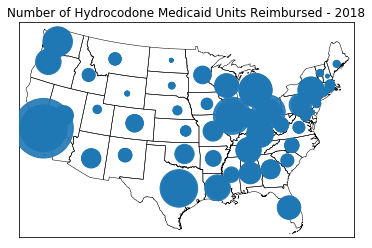

In [17]:
#Load the shape files
shp_info = basemap.readshapefile('./shape/st99_d00','states',drawbounds=True)

#x,y denote to the Longitude and Latitude values from the data set
x,y = basemap(df_data['Longitude'].values, df_data['Latitude'].values)

#Plot x,y, units (Units Reimbursed)
plt.scatter(x, y,
            df_data['Units_Reimbursed'].values/1000, 
            cmap='Blues',alpha=0.9, zorder=10)
plt.title('Number of Hydrocodone Medicaid Units Reimbursed - 2018')